In [2]:
%matplotlib inline
from matplotlib import rc
rc('text', usetex=True)
from matplotlib import rcParams
import pandas as pd
import numpy as np
from scipy.stats import linregress

In [3]:
params = {
    'xtick.labelsize':10,
    'ytick.labelsize':10,
    'axes.labelsize':10,
    'legend.fontsize':8,
    'font.family':'Times New Roman',
    'font.weight':'normal',
    'text.usetex':True
}
rcParams.update(params)
import matplotlib.pyplot as plt

plt.style.use('seaborn-notebook')

width = 2 * 3.4
height = width *.7

In [4]:
data = pd.read_csv('../data/table.csv', index_col=0)
x_R = data['x/R'].values
t = data['MJD'].values
y = np.arccos(x_R)

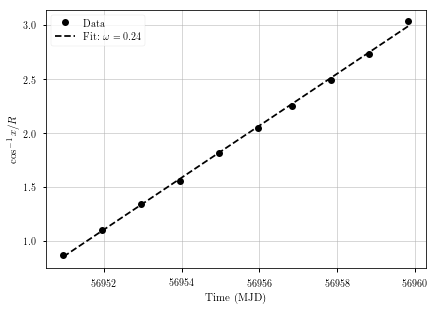

In [6]:
slope, intercept, r, p, std_err = linregress(t, y)

model = lambda t: slope*t + intercept

plt.plot(t, y, 'ko', label='Data')
plt.plot(t, model(t), 'k--', label='Fit: \omega={:.2f}'.format(slope))
plt.ylabel('\cos^{-1}{x/R}')
plt.xlabel('Time (MJD)')
plt.grid(True, alpha=.5)
plt.legend()


plt.gcf().set_size_inches(width, height)
plt.savefig(b'../docs/figs/fit.pdf', bbox_inches='tight', dpi=300)

## Getting Science from the Math

### Synodic Period
From our equations above, we see that the period of the line, which is our frequency is .24. What units is this? It is the change in a unitless value (arccos) over change in MJD. Modified Julian Date. The change of 1 MJD is equivalent to 1 day, so this frequency is $day^{-1}$. So if we want the frequency in years, we can just multiply by 365.25 $day/yr$. 

### Sidereal Period
We can get the Sidereal period by noting that the sidereal frequency is $\omega_{Side} = 1 + \omega_{Syn}$ and then $T_{Side} = 1/\omega_{Side}$

In [8]:
w_yr = slope * 365.25 / (2 * np.pi)
O = 1/w_yr
T = 1/(1+w_yr)
print(O * 365.25, O * 365.25 * std_err)
print(1/(1+w_yr)*365.25, w_yr*std_err * 365.25 / (1 + w_yr)**2)

26.1806595102 0.0588390994529
24.4295781482 0.0512314664416
